In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sustainable-luxury-consumer-survey/Sustainable_Luxury_Survey_500.xlsx


🌿 Business & Research Overview

The luxury market is evolving. Conscious consumers increasingly expect brands to uphold sustainability, transparency, and ethical responsibility — transforming sustainability from a “nice-to-have” into a decisive driver of brand equity and purchase intent.
This notebook explores how consumer psychology and data science intersect to explain and predict sustainable luxury purchase behavior. Using survey data from 500 respondents, we combine behavioral insights with predictive modeling to uncover what truly influences purchase intention in the sustainable luxury domain.

🎯 Project Objective

This analysis aims to:
1.	Model consumer purchase intention toward sustainable luxury products.
2.	Identify the most influential psychological and attitudinal factors driving eco-conscious behavior.
3.	Explain model outputs through interpretable AI techniques (SHAP) to reveal why consumers choose sustainably.
  
💼 Business Relevance

For brand strategists, marketing analytics teams, and business leaders, this notebook provides a replicable framework for:
•	Quantifying how much sustainability perception impacts buying decisions.
•	Detecting high-value consumer segments based on eco-attitudes and motivation scores.
•	Designing data-informed marketing campaigns that align sustainability with brand desirability.
The findings can directly inform product positioning, communication strategy, and CSR alignment for luxury houses seeking growth through responsibility.

🧠 Technical Approach

We evaluate several machine learning models — including Linear Regression, Random Forest, XGBoost, and Optuna-tuned ensembles — to predict consumer responses.
Model transparency is ensured through:
•	Feature importance visualizations (Random Forest & XGBoost)
•	SHAP explainability to trace feature contributions at both global and individual levels
All models are wrapped in scikit-learn pipelines with robust preprocessing, ensuring clean, reproducible experimentation.

📈 Key Insights

•	Attitudinal items (ATT1–ATT5) are dominant predictors of sustainability preference.
•	Personality traits contribute marginally but help segment nuanced consumer profiles.
•	SHAP visualizations translate complex models into actionable business understanding — showing why certain traits or attitudes lead to purchase intent.

🌍 Why This Matters

As sustainability transitions from trend to expectation, data-driven empathy becomes the new competitive edge.
This notebook demonstrates how marketing science + machine learning can quantify the emotional and cognitive dimensions of sustainability — empowering decision-makers to build brands that are not only luxurious, but also responsible and future-ready.


Candidate paths: ['/kaggle/working/Sustainable_Luxury_Survey_500.xlsx', '/kaggle/working/sustainable_luxury_survey.xlsx', '/kaggle/working/Sustainable_Luxury_Survey.xlsx', '/kaggle/input/sustainable-luxury-consumer-survey/Sustainable_Luxury_Survey_500.xlsx']
Loaded: /kaggle/input/sustainable-luxury-consumer-survey/Sustainable_Luxury_Survey_500.xlsx shape=(500, 75)
Columns: ['respondent_id', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'age_group', 'gender', 'income_level', 'region', 'att1', 'att2', 'att3', 'att4', 'att5', 'pi1', 'pi2', 'md1', 'md2', 'md3', 'stellamccartney_sustainability', 'stellamccartney_prestige', 'gucci_sustainability', 'gucci_prestige', 'fendi_sustainability', 'fendi_prestige', 'chanel_sustainability', 'chanel_prestige', 'openness_score', 'conscien

,importance
att1,0.354981
att2,0.227748
att5,0.156382
att4,0.146667
att3,0.068123
openness_score,0.002348
agreeableness_score,0.001385
n9,0.001300
motivational_drivers_score,0.001262
conscientiousness_score,0.001232


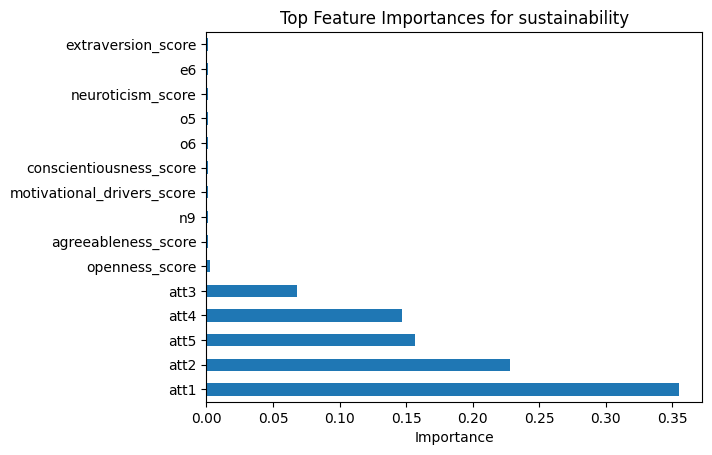


Top features for [purchase]:


,importance
pi1,0.620941
pi2,0.378821
n8,0.000048
c7,0.000030
conscientiousness_score,0.000030
neuroticism_score,0.000026
a1,0.000021
c8,0.000021
region_Middle East,0.000017
md2,0.000011


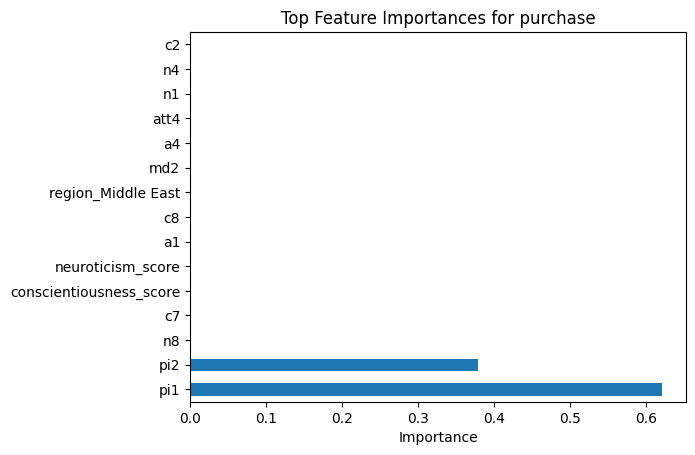

Saved models to: /kaggle/working/models

=== BASIC EDA ===
Shape: (500, 75)

Numeric summary:


,respondent_id,o1,o2,o3,o4,o5,o6,o7,o8,o9,o10,c1,c2,c3,c4,c5,c6,c7,c8,c9,e1,e2,e3,e4,e5,e6,e7,e8,a1,a2,a3,a4,a5,a6,a7,a8,n1,n2,n3,n4,n5,n6,n7,n8,n9,att1,att2,att3,att4,att5,pi1,pi2,md1,md2,md3,stellamccartney_sustainability,stellamccartney_prestige,gucci_sustainability,gucci_prestige,fendi_sustainability,fendi_prestige,chanel_sustainability,chanel_prestige,openness_score,conscientiousness_score,extraversion_score,agreeableness_score,neuroticism_score,sustainability_attitude_score,purchase_intention_score,motivational_drivers_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,3.680000,3.720000,3.678000,3.688000,3.70200,3.684000,2.292000,3.736000,2.272000,3.748000,3.602000,2.388000,3.576000,2.448000,3.588000,3.574000,3.590000,2.420000,2.388000,3.542000,2.456000,3.494000,3.488000,2.508000,3.516000,2.494000,3.524000,3.690000,2.282000,3.658000,3.708000,2.298000,3.662000,2.326000,3.688000,2.816000,3.244000,2.78400,2.818000,3.244000,2.768000,3.220000,2.794000,2.848000,2.488000,2.468000,2.514000,2.4560,2.46600,1.568000,1.576000,1.776000,1.762000,1.776000,4.482000,3.832000,3.290000,4.254000,2.762000,3.848000,2.982000,4.562000,3.707200,3.587333,3.513250,3.687500,2.791111,2.478400,1.572000,1.771333
std,144.481833,0.831253,0.857362,0.819548,0.892328,0.83101,0.893163,0.907956,0.887626,0.866902,0.870639,0.904008,0.882618,0.884188,0.925748,0.873947,0.882089,0.850498,0.906224,0.898371,0.915375,0.928325,0.918505,0.909676,0.956957,0.927072,0.894183,0.948273,0.869144,0.831781,0.895902,0.869625,0.864112,0.844501,0.846852,0.850943,0.973673,0.951986,0.93332,0.952202,0.911112,0.946556,0.910636,0.892837,0.985311,0.711948,0.738964,0.665349,0.7135,0.73343,0.591672,0.576966,0.668369,0.630993,0.656266,0.531263,0.576577,0.615351,0.564021,0.588259,0.574069,0.585116,0.512524,0.605972,0.657965,0.695439,0.613573,0.723763,0.535787,0.494272,0.530877
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.600000,1.444444,1.250000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,125.750000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.00000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,2.000000,4.000000,3.000000,4.000000,3.300000,3.111111,3.125000,3.250000,2.222222,2.200000,1.000000,1.333333
50%,250.500000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,2.000000,


Categorical summary:


,age_group,gender,income_level,region
count,500,500,500,500
unique,5,4,4,7
top,25–34,Female,Mid,North America
freq,152,244,176,149


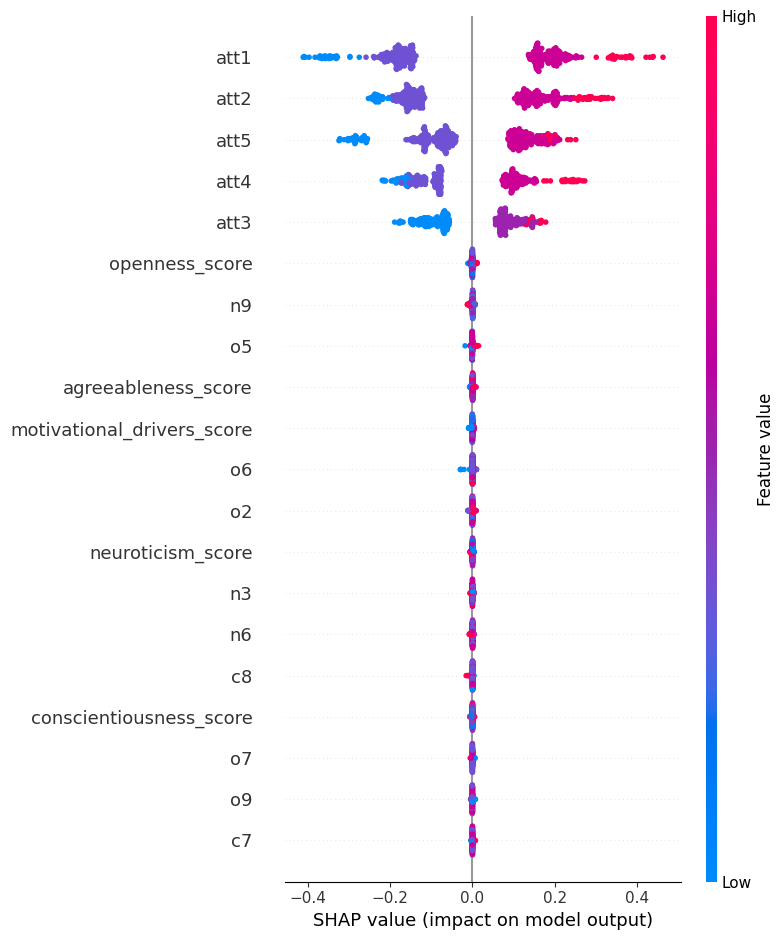

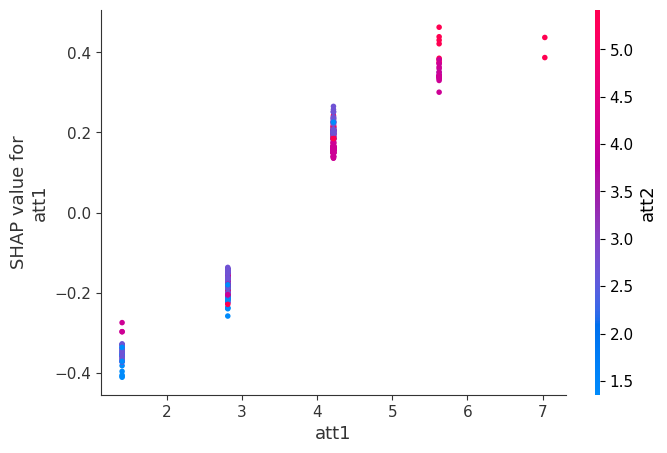

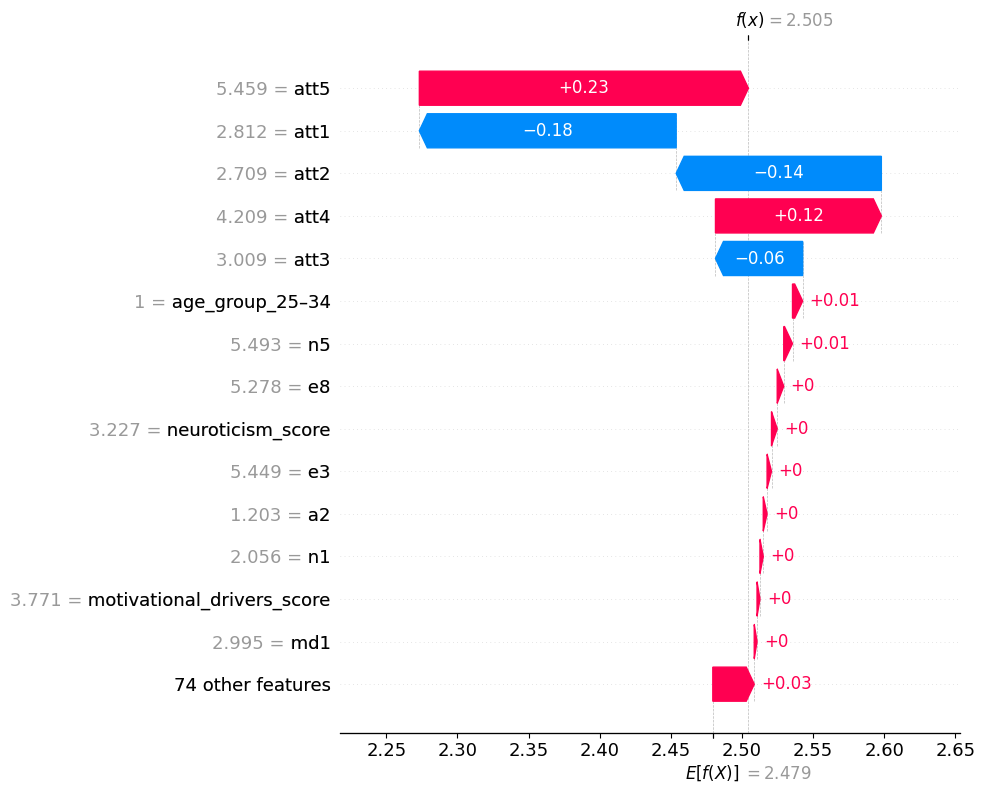

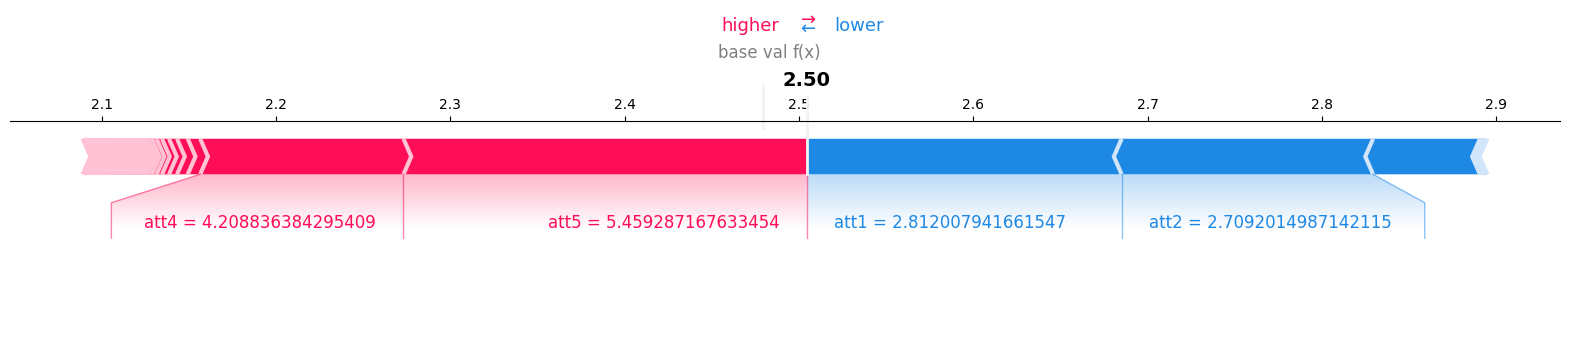

In [2]:
# ============================
# Sustainable Luxury: Full ML Pipeline
# ============================

# ---- Imports
import os, math, sys, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, accuracy_score, f1_score
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
from scipy.sparse import issparse
import joblib

# Notebook niceties
pd.set_option("display.max_columns", 120)

# If in a notebook, enable inline plotting (safe-guarded)
try:
    get_ipython
    # This IPython magic is fine in Kaggle notebooks
    # If you convert to .py, remove the next line.
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

# ---- Silence specific sklearn warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# ============================
# 1) Load Excel robustly
# ============================
candidate_paths = [
    "/kaggle/working/Sustainable_Luxury_Survey_500.xlsx",
    "/kaggle/working/sustainable_luxury_survey.xlsx",
    "/kaggle/working/Sustainable_Luxury_Survey.xlsx",
]

# Also scan /kaggle/input for Excel files if you added a Kaggle Dataset
input_dir = "/kaggle/input"
if os.path.exists(input_dir):
    for root, _, files in os.walk(input_dir):
        for f in files:
            if f.lower().endswith((".xlsx", ".xls")):
                candidate_paths.append(os.path.join(root, f))

print("Candidate paths:", candidate_paths)

df = None
for p in candidate_paths:
    if os.path.exists(p):
        try:
            df = pd.read_excel(p)
            print(f"Loaded: {p} shape={df.shape}")
            break
        except Exception as e:
            print("Tried", p, "->", e)

if df is None:
    raise FileNotFoundError(
        "No Excel found. Upload your file via the left sidebar (📁 Upload) and re-run."
    )

# ============================
# 2) Normalize column names
# ============================
df = df.rename(columns=lambda c: str(c).strip().replace(" ", "_").replace("-", "_").lower())
print("Columns:", df.columns.tolist())

# ============================
# 3) Pick targets by common aliases
# ============================
def pick_first_existing(columns, candidates):
    for c in candidates:
        if c in columns:
            return c
    return None

sust_candidates = [
    "sustainability_attitude", "sustainability_attitude_score",
    "sustainability_preference", "sustainability_preference_score",
    "attitude_toward_sustainability", "attitude_score"
]
purchase_candidates = [
    "purchase_intent", "purchase_intention", "purchase_intention_score",
    "purchase_intent_score"
]

sust_target = pick_first_existing(df.columns, sust_candidates)
purchase_target = pick_first_existing(df.columns, purchase_candidates)

if not sust_target or not purchase_target:
    raise KeyError(
        f"Could not find sustainability and/or purchase targets.\n"
        f"Columns present: {df.columns.tolist()}\n"
        f"Expected one of {sust_candidates} and one of {purchase_candidates}."
    )

print(f"Targets -> sustainability: {sust_target} | purchase: {purchase_target}")

# ============================
# 4) Build features / targets
# ============================
id_like = [c for c in df.columns if c in ["id", "respondent_id"]]
X = df.drop(columns=[sust_target, purchase_target] + id_like, errors="ignore")

y_map = {
    "sustainability": df[sust_target],
    "purchase": df[purchase_target],
}

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("Numeric features:", num_cols[:10], f"... ({len(num_cols)} total)")
print("Categorical features:", cat_cols)

# ============================
# 5) Preprocessing + models
# ============================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    # with_mean=False keeps it sparse-safe when combined with OneHot
    ("scaler", StandardScaler(with_mean=False)),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop",
)

reg_model = RandomForestRegressor(
    n_estimators=400, random_state=42, n_jobs=-1
)

clf_model = RandomForestClassifier(
    n_estimators=400, random_state=42, n_jobs=-1
)

# ============================
# 6) Regression for both targets
# ============================
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

print("\n=== REGRESSION RESULTS ===")
results_reg = {}

for name, y in y_map.items():
    if not np.issubdtype(y.dtype, np.number):
        print(f"[{name}] target is not numeric. Skipping regression for this target.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    reg_pipe = Pipeline(steps=[("prep", preprocess), ("model", reg_model)])
    reg_pipe.fit(X_train, y_train)

    preds = reg_pipe.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    score_rmse = rmse(y_test, preds)

    print(f"[{name}] MAE={mae:.3f} | RMSE={score_rmse:.3f} | R^2={r2:.3f}")

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(reg_pipe, X, y, cv=cv, scoring="r2", n_jobs=-1)
    print(f"[{name}] 5-fold CV R^2: {np.round(cv_scores,3)} | mean={cv_scores.mean():.3f}")

    results_reg[name] = dict(MAE=mae, RMSE=score_rmse, R2=r2, CV_R2_mean=cv_scores.mean())

# ============================
# 7) Optional classification: bin targets into Low/Med/High
# ============================
def bin_target(series, labels=["Low", "Med", "High"]):
    """
    Use quantile bins so classes are more balanced and
    less likely to be empty -> avoids undefined metrics.
    """
    return pd.qcut(series, q=3, labels=labels, duplicates="drop")

print("\n=== CLASSIFICATION RESULTS (Low/Med/High) ===")
results_clf = {}

for name, y_raw in y_map.items():
    if not np.issubdtype(y_raw.dtype, np.number):
        print(f"[{name}] target is not numeric. Skipping classification.")
        continue

    # Make categorical with likely non-empty bins
    y_cat = bin_target(y_raw).astype("category")
    y_cat = y_cat.cat.remove_unused_categories()

    # Train/test split (stratify preferred; fallback handled)
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
        )
    except ValueError:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_cat, test_size=0.2, random_state=42
        )

    clf_pipe = Pipeline(steps=[("prep", preprocess), ("model", clf_model)])
    clf_pipe.fit(X_train, y_train)
    preds = clf_pipe.predict(X_test)

    # Ensure consistent label order for reports
    labels_order = list(y_test.cat.categories) if hasattr(y_test, "cat") else sorted(pd.unique(y_test))

    acc = accuracy_score(y_test, preds)
    f1w = f1_score(y_test, preds, average="weighted", zero_division=0)
    print(f"[{name}] Acc={acc:.3f} | F1_w={f1w:.3f}")

    print(
        f"\nClassification report ({name}):\n",
        classification_report(
            y_test,
            preds,
            labels=labels_order,
            zero_division=0   # <- prevents UndefinedMetricWarning
        )
    )

    results_clf[name] = dict(Accuracy=acc, F1_weighted=f1w)

# ============================
# 8) Feature importance (approx)
# ============================
print("\n=== FEATURE IMPORTANCES (approximate) ===")

# Fit preprocess on ALL X to extract stable feature names
preprocess_fitted = preprocess.fit(X)

feature_names_num = num_cols
feature_names_cat = []
if len(cat_cols) > 0:
    feature_names_cat = preprocess_fitted.named_transformers_["cat"]["onehot"] \
        .get_feature_names_out(cat_cols).tolist()
feature_names = feature_names_num + feature_names_cat

X_encoded = preprocess_fitted.transform(X)
X_encoded_dense = X_encoded.toarray() if issparse(X_encoded) else X_encoded

for name, y in y_map.items():
    if not np.issubdtype(y.dtype, np.number):
        print(f"[{name}] target non-numeric -> skipping feature importance.")
        continue

    rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
    rf.fit(X_encoded_dense, y)

    imps = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
    topk = imps.head(15)

    print(f"\nTop features for [{name}]:")
    display(topk.to_frame("importance"))

    plt.figure()
    topk.sort_values().plot(kind="barh")
    plt.title(f"Top Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.show()

# ============================
# 9) Save trained full-data regressors
# ============================
out_dir = "/kaggle/working/models"
os.makedirs(out_dir, exist_ok=True)

for name, y in y_map.items():
    if not np.issubdtype(y.dtype, np.number):
        continue
    pipe_full = Pipeline(steps=[
        ("prep", preprocess),
        ("model", RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1))
    ])
    pipe_full.fit(X, y)
    joblib.dump(pipe_full, os.path.join(out_dir, f"rf_regressor_{name}.joblib"))

print("Saved models to:", out_dir)

# ============================
# 10) Quick EDA prints
# ============================
print("\n=== BASIC EDA ===")
print("Shape:", df.shape)

print("\nNumeric summary:")
display(df.describe(include="number"))

print("\nCategorical summary:")
display(df.describe(include="object"))

# ============================
# 11) SHAP EXPLANATIONS (Sustainability model)
# ============================
import shap

# Refit a pipeline on full data for "sustainability" regression (numeric check)
if np.issubdtype(y_map["sustainability"].dtype, np.number):
    shap_pipe = Pipeline(steps=[("prep", preprocess), ("model", reg_model)])
    shap_pipe.fit(X, y_map["sustainability"])

    # Encoded features
    X_enc = shap_pipe.named_steps["prep"].transform(X)
    X_enc_dense = X_enc.toarray() if issparse(X_enc) else X_enc

    # TreeExplainer for RandomForestRegressor
    explainer = shap.TreeExplainer(shap_pipe.named_steps["model"])
    shap_values = explainer.shap_values(X_enc_dense)

    # Build feature name list again (safe for no-cats)
    feature_names_shap = num_cols[:]
    if len(cat_cols):
        feature_names_shap += preprocess_fitted.named_transformers_["cat"]["onehot"] \
            .get_feature_names_out(cat_cols).tolist()

    # Summary plot
    shap.summary_plot(shap_values, features=X_enc_dense, feature_names=feature_names_shap)

    # Dependence plot (pick a sensible feature that exists)
    # If "att1" doesn't exist, fall back to the first numeric column
    dep_feat = "att1" if "att1" in feature_names_shap else (feature_names_shap[0] if len(feature_names_shap) else None)
    if dep_feat is not None:
        shap.dependence_plot(dep_feat, shap_values, X_enc_dense, feature_names=feature_names_shap)

    # Waterfall / force for one respondent
    sample_idx = 0
    shap.initjs()

    # New SHAP Explanation object (waterfall)
    try:
        exp = shap.Explanation(
            values=shap_values[sample_idx],
            base_values=explainer.expected_value,
            data=X_enc_dense[sample_idx],
            feature_names=feature_names_shap
        )
        shap.plots.waterfall(exp, max_display=15)
    except Exception as e:
        print("Waterfall explanation failed:", e)

    # Matplotlib force plot fallback
    try:
        shap.force_plot(
            base_value=explainer.expected_value,
            shap_values=shap_values[sample_idx, :],
            features=X_enc_dense[sample_idx, :],
            feature_names=feature_names_shap,
            matplotlib=True
        )
    except Exception as e:
        print("Force plot failed:", e)
else:
    print("Sustainability target is non-numeric; skipping SHAP.")
